# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | revda
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | ust'-ordynskiy
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | seven pagodas
Processing Record 10 of Set 1 | tieli
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | novodvinsk
Processing Record 15 of Set 1 | khandyga
Processing Record 16 of Set 1 | san rafael
Processing Record 17 of Set 1 | san felipe
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | alvaraes
Processing Record 20 of Set 1 | muisne
Processing Record 21 of Set 1 | mount pearl
Processing Record 22 of Set 1 

Processing Record 41 of Set 4 | natal
Processing Record 42 of Set 4 | angra do heroismo
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | kayangel
Processing Record 45 of Set 4 | atafu village
Processing Record 46 of Set 4 | luganville
Processing Record 47 of Set 4 | bodaybo
Processing Record 48 of Set 4 | kongoussi
Processing Record 49 of Set 4 | yulinshi
Processing Record 0 of Set 5 | jamestown
Processing Record 1 of Set 5 | punta arenas
Processing Record 2 of Set 5 | klyuchi
Processing Record 3 of Set 5 | maine soroa
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | ha'il
Processing Record 6 of Set 5 | kadnikov
Processing Record 7 of Set 5 | clarkston heights-vineland
Processing Record 8 of Set 5 | crescent city
Processing Record 9 of Set 5 | remire-montjoly
Processing Record 10 of Set 5 | tromso
Processing Record 11 of Set 5 | haiku-pauwela
Processing Record 12 of Set 5 | timra
Processing Record 13 of 

Processing Record 35 of Set 8 | shangri-la
City not found. Skipping...
Processing Record 36 of Set 8 | ploneour-lanvern
Processing Record 37 of Set 8 | camlidere
Processing Record 38 of Set 8 | mersa matruh
Processing Record 39 of Set 8 | saudarkrokur
Processing Record 40 of Set 8 | altai
Processing Record 41 of Set 8 | petropavlovsk-kamchatsky
Processing Record 42 of Set 8 | upington
Processing Record 43 of Set 8 | mombetsu
Processing Record 44 of Set 8 | urangan
Processing Record 45 of Set 8 | abaza
Processing Record 46 of Set 8 | qamdo
Processing Record 47 of Set 8 | touros
Processing Record 48 of Set 8 | petrozavodsk
Processing Record 49 of Set 8 | lokken
City not found. Skipping...
Processing Record 0 of Set 9 | bardsir
Processing Record 1 of Set 9 | emerald
Processing Record 2 of Set 9 | bafoulabe
Processing Record 3 of Set 9 | edson
Processing Record 4 of Set 9 | karratha
Processing Record 5 of Set 9 | krutinka
Processing Record 6 of Set 9 | castillos
Processing Record 7 of Set 

Processing Record 26 of Set 12 | vrangel'
Processing Record 27 of Set 12 | san andres
Processing Record 28 of Set 12 | praia da vitoria
Processing Record 29 of Set 12 | papao
Processing Record 30 of Set 12 | san fernando
Processing Record 31 of Set 12 | alice springs
Processing Record 32 of Set 12 | hotan
Processing Record 33 of Set 12 | pitimbu
Processing Record 34 of Set 12 | borogontsy
Processing Record 35 of Set 12 | shalqar
Processing Record 36 of Set 12 | lijiang
Processing Record 37 of Set 12 | costa teguise
City not found. Skipping...
Processing Record 38 of Set 12 | klaksvik
Processing Record 39 of Set 12 | kirensk
Processing Record 40 of Set 12 | massakory
Processing Record 41 of Set 12 | anloga
Processing Record 42 of Set 12 | sao joao da barra
Processing Record 43 of Set 12 | alexandria
Processing Record 44 of Set 12 | ivdel'
Processing Record 45 of Set 12 | segorbe
Processing Record 46 of Set 12 | sao pedro do sul
Processing Record 47 of Set 12 | parun
Processing Record 48

In [22]:
len(city_data_df["Max Temp"])
len(city_data_df["Humidity"])

593

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,4.77,94,75,5.14,GB,1701981874
1,yellowknife,62.4560,-114.3525,-10.71,92,100,3.09,CA,1701981874
2,revda,56.8010,59.9303,-32.59,97,5,0.44,RU,1701981875
3,hermanus,-34.4187,19.2345,18.89,87,26,4.32,ZA,1701981875
4,ust'-ordynskiy,52.8050,104.7508,-29.08,88,10,4.50,RU,1701981875


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,4.77,94,75,5.14,GB,1701981874
1,yellowknife,62.4560,-114.3525,-10.71,92,100,3.09,CA,1701981874
2,revda,56.8010,59.9303,-32.59,97,5,0.44,RU,1701981875
3,hermanus,-34.4187,19.2345,18.89,87,26,4.32,ZA,1701981875
4,ust'-ordynskiy,52.8050,104.7508,-29.08,88,10,4.50,RU,1701981875


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

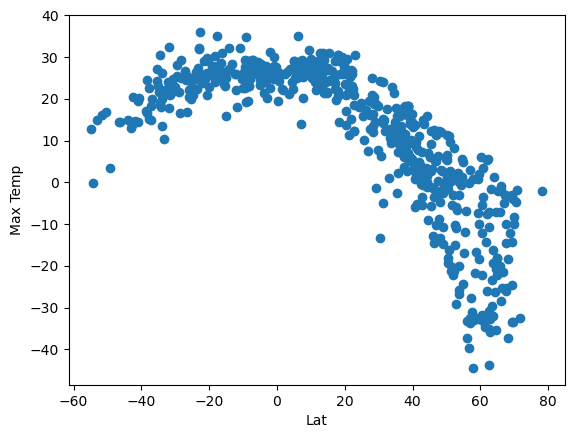

In [27]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Max Temp")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

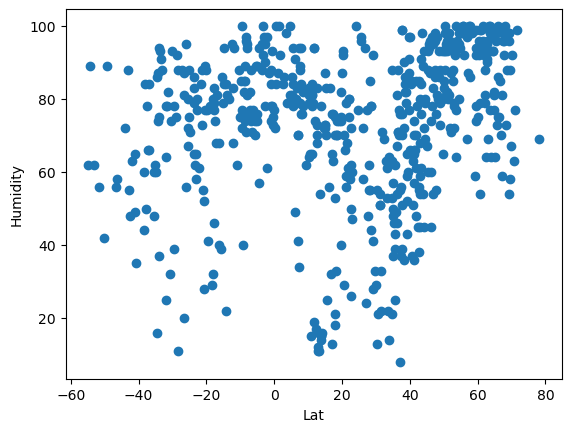

In [28]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

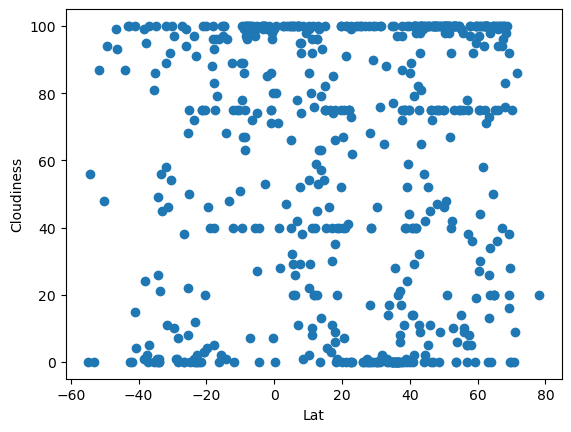

In [29]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

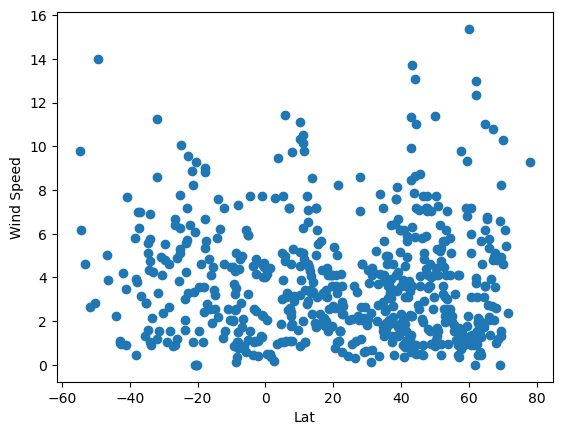

In [30]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

x_values = city_data_df["Northern_Hemi"]
y_values = city_data_df["Southern_Hemi"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("x_label")
plt.ylabel("y_label")
plt.show()

KeyError: 'Northern_Hemi'

In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def num_multiply 

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [52]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE


In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE